# Modeling

Frequently used libraries are imported.
The dataset imported from the csv file.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output
from bokeh.layouts import gridplot
from bokeh.models import HoverTool
import osmnx as ox
import geopandas as gpd
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import re

In [171]:
real_estate=pd.read_csv('../Datasets/Real_Estate_Sales_2001-2020_GL.csv')
real_estate.sample(10)

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/1343657660.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate=pd.read_csv('../Datasets/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
752207,150646,2015,09/01/2016,Glastonbury,8 COPLEY RD,170300.0,249900.0,0.681473,Condo,Condo,NaN,NaN,NaN,NaN
29285,20027,2020,10/07/2020,Newtown,58 ALPINE CIRCLE,40870.0,14999.0,2.724848,Vacant Land,NaN,25 - Other,NaN,"BELOW MARKET - RESOLD APRIL 2022 FOR $50,000 P...",POINT (-73.24461 41.42593)
573497,100292,2010,05/17/2011,East Hartford,441 MAIN ST #708,16760.0,13500.0,1.241481,Single Family,Single Family,25 - Other,Mobile Home,NaN,POINT (-72.64046 41.75264)
125422,20061,2002,10/24/2002,Hamden,2305 WHITNEY AVE,288330.0,1220000.0,0.236336,NaN,NaN,25,NaN,NaN,NaN
196133,30751,2003,07/16/2004,Shelton,26 GRAY ST,5110.0,7000.0,0.730000,NaN,NaN,12.0,NaN,NaN,NaN
935488,180013,2018,10/16/2018,Westport,21 BAUER PLACE EXT,386200.0,530000.0,0.728600,Single Family,Single Family,NaN,NaN,NaN,NaN
634430,12748,2012,01/15/2013,East Hartford,154 RIDGEWOOD RD.,133860.0,203000.0,0.659409,Single Family,Single Family,NaN,NaN,NaN,NaN
436312,60251,2006,06/06/2007,Windham,335 N WINDHAM RD,128910.0,80000.0,1.611375,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
262174,40054,2004,03/23/2005,Goshen,19 MILTON RD,31700.0,125000.0,0.253600,NaN,NaN,NaN,NaN,NaN,NaN
870492,170448,2017,03/29/2018,Meriden,250 GRAVEL ST,86870.0,175500.0,0.494900,Single Family,Single Family,07 - Change in Property,NaN,NaN,NaN


Since the columnn `location` is in a string datatype in `POINT (XX.XXXXXX, XX.XXXXX)` format, it will be divided into two columns of the float datatype. 

First, use Regular Expression to find the two floats that might be negative.

In [174]:


def extract_coordinates(location):
    if isinstance(location, str):
        match = re.search(r'\((-?\d+\.\d+)\s(-?\d+\.\d+)\)', location)
        if match:
            return match
    return None


##### Explanation of the regex search:
- `re.search`` matches the characters search literally (case sensitive)

This regex Capturing Group is repeated twice to find the coordinats in the string column of `location`: 
> \((-?\d+\.\d+)\s <

- `?` matches the previous token (which is `-`) between zero and one times, as many times as possible, giving back as needed (greedy). As a result, it preserves the minus sign, indicating that the number could be negative.
- `\d` matches a digit (equivalent to [0-9])
- `+` matches the previous token (which is a digit) between one and unlimited times, as many times as possible, giving back as needed (greedy). As a result, it preserves all the digits.
- `\.` matches the character which the period `.`
- `\d` matches a digit (equivalent to [0-9])
- `+` matches the previous token (which is a digit) between one and unlimited times, as many times as possible, giving back as needed (greedy)
- `\s` matches any whitespace character.

Reference: Used the built-in explanation on https://regex101.com.



In [ ]:
#The first group is the latitude
def extract_latitude(coordinates):
    if coordinates is not None:
        return coordinates[1]
    return None

#The second group is the longitude
def extract_longitude(coordinates):
    if coordinates is not None:
        return coordinates[2]
    return None

In [ ]:
# Apply the extract_latitude and extract_longitude function

real_estate['coordinates'] = real_estate['Location'].apply(extract_coordinates)
real_estate['latitude'] = real_estate['coordinates'].apply(extract_latitude)
real_estate['longitude'] = real_estate['coordinates'].apply(extract_longitude)

# Convert latitude and longitude columns to numeric types
real_estate['latitude'] = pd.to_numeric(real_estate['latitude'])
real_estate['longitude'] = pd.to_numeric(real_estate['longitude'])

real_estate.sample(10)

From this output, it is evident that `latitude` and `longitude` columns have the successfully extracted coordinates.

Next, check the datatypes of `latitude` and `longitude`

In [176]:
print(real_estate.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
 14  coordinates       197696 non-null  object 
 15  latitude          197696 non-null  float64
 16  longitude         19

Change the `Date Recorded` from Object to DateTime.

In [182]:
real_estate['Date Recorded'] = pd.to_datetime(real_estate['Date Recorded'])
real_estate['Date Recorded'].dtype

dtype('<M8[ns]')

In [183]:
real_estate_nonull = real_estate.dropna(subset=['Date Recorded', 'Location', 'longitude'])
real_estate.drop(real_estate[real_estate['OPM remarks'] == 'INCORRECT SALE PRICE'].index, inplace=True)

real_estate_nonull.sample()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,coordinates,latitude,longitude
521281,900161,2009,2010-03-30,New London,100 PEQUOT AVE 4063,21000.0,25000.0,0.84,Condo,Condo,NaN,DOCKOMINIUM,NaN,POINT (-72.09963 41.33882),"<re.Match object; span=(6, 26), match='(-72.09...",-72.09963,41.33882


In [150]:



real_estate['Non Use Code'] = real_estate['Non Use Code'].str.replace(r'[a-zA-Z-]', '')

real_estate['Non Use Code']  = real_estate['Non Use Code'].str.replace(r'0([1-9])\b', r'\1')

real_estate['Non Use Code']  = real_estate['Non Use Code'].str.replace(r'\s', '')


real_estate['Non Use Code'].value_counts().head(10)

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3547753858.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  real_estate['Non Use Code'] = real_estate['Non Use Code'].str.replace(r'[a-zA-Z-]', '')
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3547753858.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  real_estate['Non Use Code']  = real_estate['Non Use Code'].str.replace(r'0([1-9])\b', r'\1')
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3547753858.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  real_estate['Non Use Code']  = real_estate['Non Use Code'].str.replace(r'\s', '')


25    62822
14    54385
7     43669
8     18976
1     17257
6      6543
10     5687
28     5469
3      4327
18     3802
Name: Non Use Code, dtype: int64

In [151]:
real_estate_nonull = real_estate_nonull.drop(columns=['Serial Number', 'Date Recorded', 'Sales Ratio', 'Address', 'Location', 'coordinates','Assessor Remarks'	, 'OPM remarks'], axis=1)
real_estate_nonull.sample()

,List Year,Town,Assessed Value,Sale Amount,Property Type,Residential Type,Non Use Code,latitude,longitude
947169,2019,Derby,152600.0,178000.0,Two Family,Two Family,14,-73.0776,41.32784


plotly, tableau map
look for datasets
interest rate


In [121]:
#Missing values check
print(".info of All Columns\n", real_estate_nonull.info())
print("Null Values in Total\n", real_estate_nonull.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197696 entries, 10 to 997206
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   List Year         197696 non-null  int64  
 1   Town              197696 non-null  object 
 2   Assessed Value    197696 non-null  float64
 3   Sale Amount       197696 non-null  float64
 4   Property Type     126043 non-null  object 
 5   Residential Type  123754 non-null  object 
 6   Non Use Code      54647 non-null   object 
 7   latitude          197696 non-null  float64
 8   longitude         197696 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.1+ MB
.info of All Columns
 None
Null Values in Total
 List Year                0
Town                     0
Assessed Value           0
Sale Amount              0
Property Type        71653
Residential Type     73942
Non Use Code        143049
latitude                 0
longitude                0
dtype:

In [152]:
coded_real_estate = pd.get_dummies(real_estate_nonull, columns=['List Year', 'Town', 'Property Type', 'Residential Type', 'Non Use Code'])

In [153]:
X = coded_real_estate.drop(['Sale Amount', 'Assessed Value'], axis=1)

In [162]:
y = coded_real_estate['Assessed Value']


In [163]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [164]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [165]:
X_train.shape

(158156, 241)

In [166]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

In [145]:
train_scores = []
test_scores = []

ks = list(range(10, 100, 10))

for k in ks: 
    my_KBest = SelectKBest(f_regression, k=k).fit(X_train, y_train)
    
    X_train_selected = my_KBest.transform(X_train)
    X_test_selected = my_KBest.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    print(f"K = {X_train.columns[my_KBest.get_support()]}")

    
    
    train_scores.append(model.score(X_train_selected, y_train))
    test_scores.append(model.score(X_test_selected, y_test))



K = Index(['latitude', 'longitude', 'List Year_2020', 'Town_Darien',
       'Town_Greenwich', 'Town_New Canaan', 'Town_Stamford', 'Town_Westport',
       'Property Type_Apartments', 'Property Type_Commercial'],
      dtype='object')
K = Index(['latitude', 'longitude', 'List Year_2001', 'List Year_2020',
       'Town_Bridgeport', 'Town_Darien', 'Town_Fairfield', 'Town_Greenwich',
       'Town_New Canaan', 'Town_Norwalk', 'Town_Stamford', 'Town_Waterbury',
       'Town_Westport', 'Town_Wilton', 'Property Type_Apartments',
       'Property Type_Commercial', 'Property Type_Condo',
       'Property Type_Residential', 'Residential Type_Condo',
       'Non Use Code_14'],
      dtype='object')
K = Index(['latitude', 'longitude', 'List Year_2001', 'List Year_2020',
       'Town_Bridgeport', 'Town_Bristol', 'Town_Darien', 'Town_Fairfield',
       'Town_Greenwich', 'Town_New Britain', 'Town_New Canaan', 'Town_Norwalk',
       'Town_Ridgefield', 'Town_Stamford', 'Town_Torrington', 'Town_Waterbury'

In [167]:
X_withconstant = sm.add_constant(X_train)

In [168]:
myregression = sm.OLS(y_train, X_withconstant)


In [169]:

myregression_results = myregression.fit()

myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Assessed Value   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     73.42
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:51:47   Log-Likelihood:            -2.4547e+06
No. Observations:              158156   AIC:                         4.910e+06
Df Residuals:                  157918   BIC:                         4.912e+06
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           6.132e+06   4.28e+06      1.432      0.152   -2.26e+06    1.45e+07
latitude                       -2722.2470   2.48e+04     -0.110      0.913   -5.14e+04     4.6e+04
longitude                      -1.399e+05   8.18e+04     -1.709      0.087      -3e+05    2.05e+04
List Year_2001                 -4.801e+05   2.17e+05     -2.216      0.027   -9.05e+05   -5.55e+04
List Year_2002                 -4.474e+05   2.17e+05     -2.066      0.039   -8.72e+05    -2.3e+04
List Year_2003                 -4.344e+05   2.16e+05     -2.007      0.045   -8.59e+05   -1.03e+04
List Year_2004                 -4.077e+05   2.16e+05     -1.884      0.060   -8.32e+05    1.64e+04
List Year_2005                 -3.899e+05   2.17e+05     -1.800      0.072   -8.14e+05    3.45e+04
List Year_2006                  5.143e+05   2.16e+05      2.378      0.017    9.03e+04    9.38e+05
List Year_2007                  5.315e+05   2.17e+05      2.455      0.014    1.07e+05    9.56e+05
List Year_2008                  6.034e+05   2.17e+05      2.786      0.005    1.79e+05    1.03e+06
List Year_2009                  6.398e+05   2.16e+05      2.956      0.003    2.16e+05    1.06e+06
List Year_2010                  6.121e+05   2.17e+05      2.827      0.005    1.88e+05    1.04e+06
List Year_2011                  6.437e+05   2.17e+05      2.972      0.003    2.19e+05    1.07e+06
List Year_2012                  5.494e+05   2.17e+05      2.537      0.011    1.25e+05    9.74e+05
List Year_2013                  6.189e+05   2.17e+05      2.858      0.004    1.94e+05    1.04e+06
List Year_2014                  5.668e+05   2.16e+05      2.620      0.009    1.43e+05    9.91e+05
List Year_2015                  5.988e+05   2.16e+05      2.767      0.006    1.75e+05    1.02e+06
List Year_2016                  6.283e+05   2.16e+05      2.903      0.004    2.04e+05    1.05e+06
List Year_2017                  5.871e+05   2.16e+05      2.713      0.007    1.63e+05    1.01e+06
List Year_2018                  5.816e+05   2.16e+05      2.688      0.007    1.58e+05    1.01e+06
List Year_2019                  5.661e+05   2.16e+05      2.616      0.009    1.42e+05     9.9e+05
List Year_2020                  4.941e+04   2.74e+05      0.180      0.857   -4.88e+05    5.87e+05
Town_Andover                   -4623.6613   1.08e+05     -0.043      0.966   -2.16e+05    2.07e+05
Town_Ansonia                   -1.218e+05   5.02e+04     -2.427      0.015    -2.2e+05   -2.34e+04
Town_Ashford                   -7.504e+04   9.57e+04     -0.784      0.433   -2.63e+05    1.13e+05
Town_Avon                       1.627e+05   5.89e+04      2.762      0.006    4.73e+04    2.78e+05
Town_Barkhamsted               -3.901e+04   1.15e+05     -0.339      0.735   -2.64e+05    1.86e+05
Town_Beacon Fa

In [12]:
for column in (real_estate.columns):
    if (real_estate_nonull[column].isna().sum())== 0:
        pass
        #print (column, " passed")
    else:
        nunique_values = real_estate[column].nunique()
        unique_values = real_estate[column].unique()
        value_counts = real_estate[column].value_counts()
        print(f"The column name is {column}")
        print(f"The total number of unique values are: {nunique_values}")
        print(f"The value counts are: {value_counts}")

The column name is Non Use Code
The total number of unique values are: 106
The value counts are: 25 - Other                 59916
14 - Foreclosure           52445
07 - Change in Property    34248
08 - Part Interest         15496
7.0                        14381
                           ...  
38.0                           1
48.0                           1
68.0                           1
33                             1
75                             1
Name: Non Use Code, Length: 106, dtype: int64
The column name is Assessor Remarks
The total number of unique values are: 66508
The value counts are: ESTATE SALE                                                               5044
BELOW MARKET                                                              2568
SHORT SALE                                                                2510
NEW CONSTRUCTION                                                          2048
FORECLOSURE                                                               1

Findings:
   - `Date` column can be changed to DateTime format
   - `Date Recorded`, `Town`, `Address`, `Assessed Value`, `Sale Amount`, `Sale Ratio` have very few missing values.
   - Address has 51 missingcolumns.
   - About 1/3 of rows missing in `Property Type` and `Residential Type`.
   - About 20% of the data has `Location` or longitude and latitude.
   

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/1560488043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = real_estate.corr()


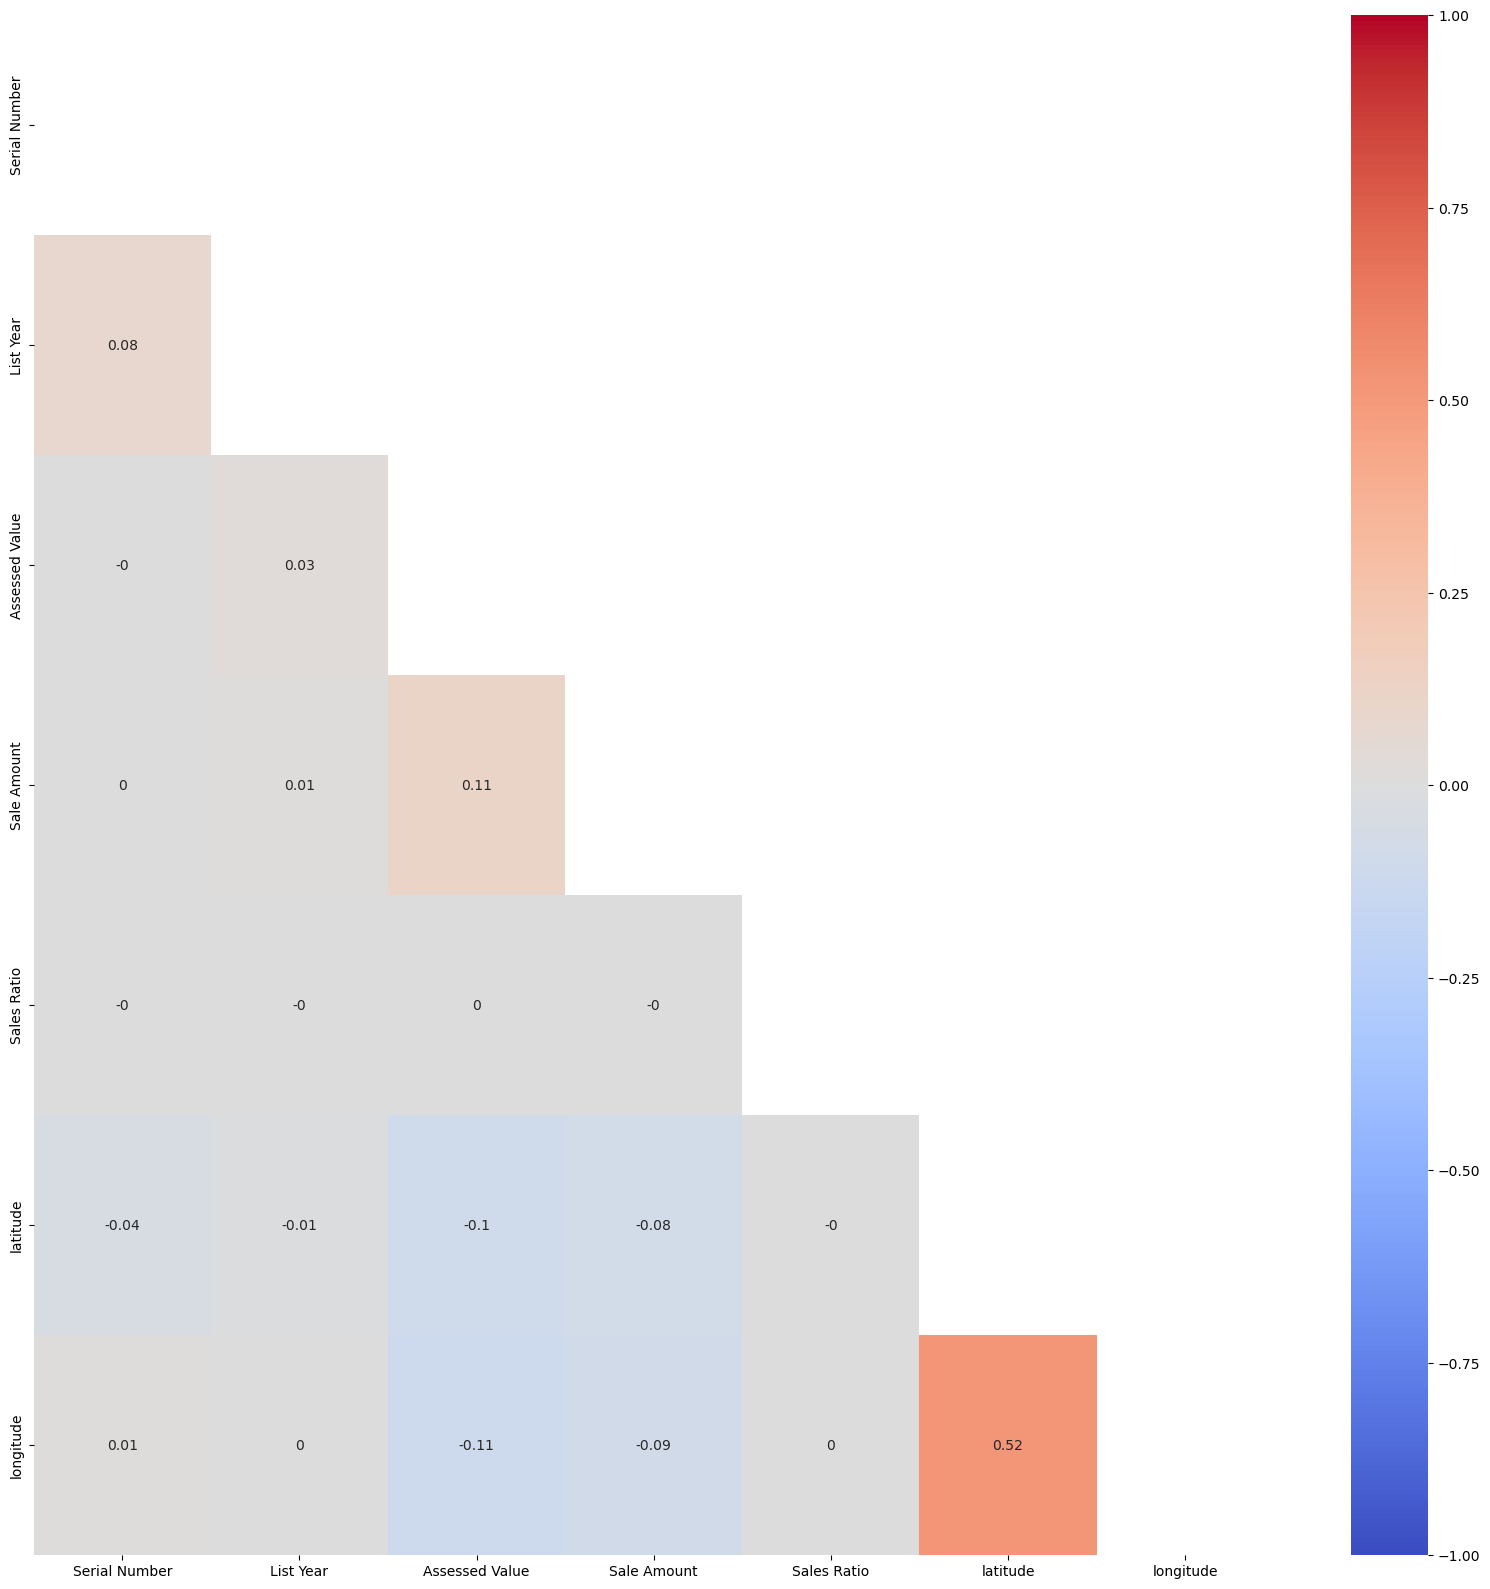

In [62]:
corr_df = real_estate.corr()
mask = np.triu(corr_df)
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True,mask=mask, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

Findings:
   - `Assessed Value` and `Sale Amount` is weakly correlated (r=0.11).

<Axes: xlabel='List Year', ylabel='Sale Amount'>

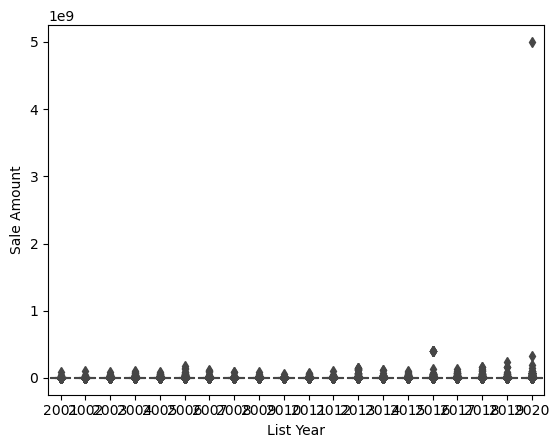

In [57]:
sns.boxplot(x='List Year', y='Sale Amount', data=real_estate)

In the `OPM remarks`, it is stated that an *INCORRECT SALE PRICE* is inserted. So this row will be deleted and will investigate if other rows have the same comment.

/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/1412154279.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.barh(real_estate.groupby('Property Type').mean()["Sale Amount"].index, real_estate.groupby('Property Type').mean()["Sale Amount"])
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/1412154279.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.barh(real_estate.groupby('Property Type').mean()["Sale Amount"].index, real_estate.groupby('Property Type').mean()["Sale Amount"])


Text(0.5, 1.0, 'Mean Sale Amount by Property Type')

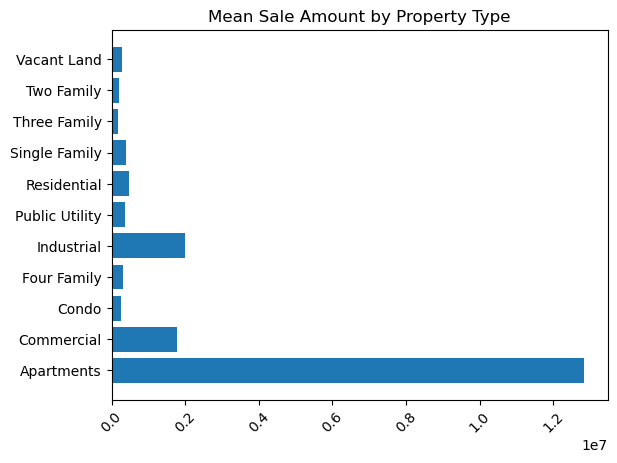

In [60]:
plt.barh(real_estate.groupby('Property Type').mean()["Sale Amount"].index, real_estate.groupby('Property Type').mean()["Sale Amount"])
plt.xticks(rotation=45)
plt.title('Mean Sale Amount by Property Type')


/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3408167422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.barh(real_estate.groupby('List Year').mean()['Sale Amount'].index, real_estate.groupby('List Year').mean()["Sale Amount"])
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3408167422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.barh(real_estate.groupby('List Year').mean()['Sale Amount'].index, real_estate.groupby('List Year').mean()["Sale Amount"])


Text(0.5, 1.0, 'Mean Sale Amount by List Year')

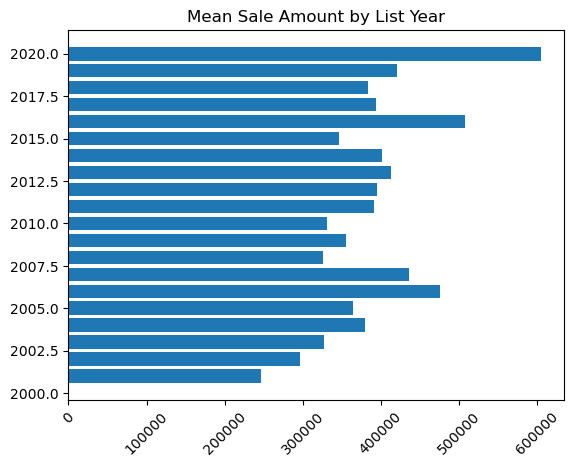

In [61]:
plt.barh(real_estate.groupby('List Year').mean()['Sale Amount'].index, real_estate.groupby('List Year').mean()["Sale Amount"])
plt.xticks(rotation=45)
plt.title('Mean Sale Amount by List Year')


/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3625603822.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  real_estate['Non Use Code'] = real_estate['Non Use Code'].str.replace(r'[a-zA-Z-]', '')
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3625603822.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  real_estate['Non Use Code']  = real_estate['Non Use Code'].str.replace(r'0([1-9])\b', r'\1')
/var/folders/kv/4xjj0g696_lcyc7ms5pdd2t00000gn/T/ipykernel_68671/3625603822.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  real_estate['Non Use Code']  = real_estate['Non Use Code'].str.replace(r'\s', '')


39